### 회귀 Regression

- 데이터값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계 기법

- 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링


#### 종류

- 일반 선형 회귀: 실제값과 예측값의 차이(오류의 제곱값)를 최소화하는 직선형 회귀선을 최적화하는 방식, 규제를 적용하지 않음

- 릿지 회귀: 선형 회귀에 L2규제를 추가한 모델(회귀계수값을 작게 만드는)
\
- 라쏘 회귀: 선형 회귀에 L1규제를 적용한 방식(피처가 선택되지 않게 만드는)

- 엘라스틱넷 회귀: 선형 회귀에 L1, L2규제를 함께 결합한 모델(L1으로 피처 개수를 줄임과 동시에 L2로 계수값을 조절)

- 로지스틱 회귀: 회귀라는 이름이 붙었지만, 강력한 분류 알고리즘. 이진 분류뿐만 아니라 텍스트 분류같은 영역에서도 뛰어남

> RSS, 오차제곱합을 최소로 하는 회귀 계수를 학습을 통해 찾는 것이 머신러닝 기반 회귀 학습의 핵심이다

#### 경사하강법 Gradient Descent

- 회귀에서 RSS는 비용이며 w 변수로 구성되는 RSS를 비용 함수라고 한다

- 점진적으로 반복적인 계산을 통해 바용 함수가 최소가 되는 W 파라미터를 구하는 것

- 경사하강법은 반복적으로 비용 함수의 반환값, 즉 예측값과 실제값의 차이가 작아지는 방향성을 가지고 W 파라미터를 보정해나감

<일반적인 프로세스>

1. 회귀 계수인 w0, w1을 임의의 값으로 설정하고 첫 비용 함수의 값을 계산한다

2. w1을 w1 + η * 2/N∑Xi * (실제값-예측값), w0를 w0 + η * 2/N∑Xi * (실제값-예측값)으로 업데이트한 후 다시 비용 함수의 값을 계산한다

3. 비용 함수가 감소하는 방향으로 주어진 횟수만큼 2단계를 반복하면서 w1과 w0을 업데이트한다

#### 경사하강법 코드로 구현하기

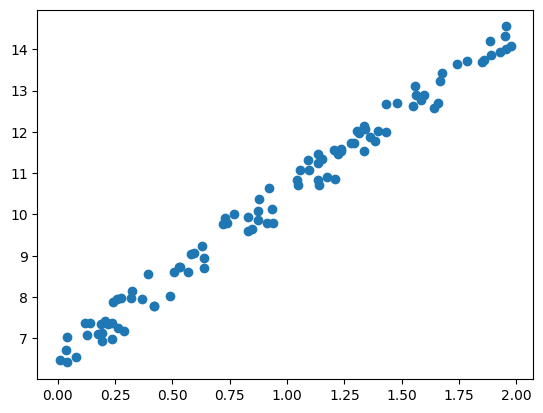

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# y = 4x + 6을 근사(w1=4, w0=6)하기 위한 100개의 데이터셋, 임의의 값은 노이즈를 위해 만듬
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.rand(100, 1)

#산점도 시각화
plt.scatter(X, y)

In [7]:
#비용 함수 정의
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred)) / N
  return cost

In [3]:
#get_weight_updates() 함수를 생성해서 입력배열 X에 대한 예측값을 np.dot() 내적 연산을 통해 구해주기

def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N = len(y)
  #0으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  #예측 배열 계산하고 예측과 실제값의 차이 계산
  y_pred = np.dot(X, w1.T) + w0
  diff = y - y_pred

  #w0_update를 dot 행렬 연산으로 구하기 위해 값이 모두 1인 행렬 생성
  w0_factors = np.ones((N,1))

  w1_update = -(2/N) * learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N) * learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [5]:
#gradient_descent() 함수를 생성해서 w1과 w0을 모두 0으로 초기화한 뒤 iters개수만큼 반복하면서 업데이트해주기

def gradient_descent_steps(X, y, iters=10000):
  #0으로 초기화
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  #iters만큼 반복적으로 함수 호출
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [9]:
#앞서 만든 gradient_descent_steps()를 호출해 w1, w0 구하고 비용 함수로 경사하강법 예측 오류 계산하기

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.028 w0:6.490
Gradient Descent Total Cost:0.0775


실제 선형식인 y = 4X + 6과 유사하게 w1은 4.028, w0은 6.490으로 도출되었다

예측 오류 비용은 약 0.0775

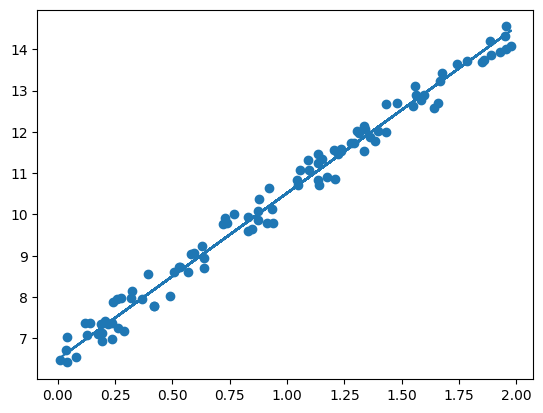

In [10]:
plt.scatter(X, y)
plt.plot(X, y_pred)

일반적으로 경사하강법은 모든 학습데이터에 대해 반복적으로 값을 업데이트하기 때문에 수행 시간이 오래 걸린다.

따라서, 실전에서는 '확률적 경사하강법'을 이용하여 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 속도가 빨라진다

대용량 데이터의 경우, '미니 배치 확률적 경사하강법'을 이용하기도 함

#### 미니 배치 확률적 경사하강법 구현하기

In [11]:
#앞서 만든 gradient_descent_steps()와 별로 다르지 않지만 전체 X, y데이터에서 랜덤하게 batch_size만큼 추출해 이를 기반으로 업데이트값을 계산함

def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  for ind in range(iters):
    np.random.seed(ind)

    #전체 X, y데이터에서 batch_size만큼 랜덤하게 추출해 sample로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]

    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [12]:
w1, w0 =  stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1:', round(w1[0,0], 3), 'w0:', round(w0[0,0], 3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.031 w0: 6.486
Stochastic Gradient Descent Total Cost:0.0777


미니 배치 확률적 경사하강법으로 구한 w0, w1결과는 일반 경사하강법으로 구한 결과와 큰 차이가 없음

예측 오류 비용도 아주 조금 높아짐

피처가 여러개인 경우도 1개인 경우를 확장해 유사하게 도출할 수 있음. 피처가 M개 있다면 회귀 계수도 M+1개로 도출